<a href="https://colab.research.google.com/github/LouisKimDev/MobilityVisionSystem/blob/main/MVS_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question1. RGB 이미지를 세 개의 채널(R, G, B)로 분리한 뒤 다시 합치는 프로그램을 작성하시오.

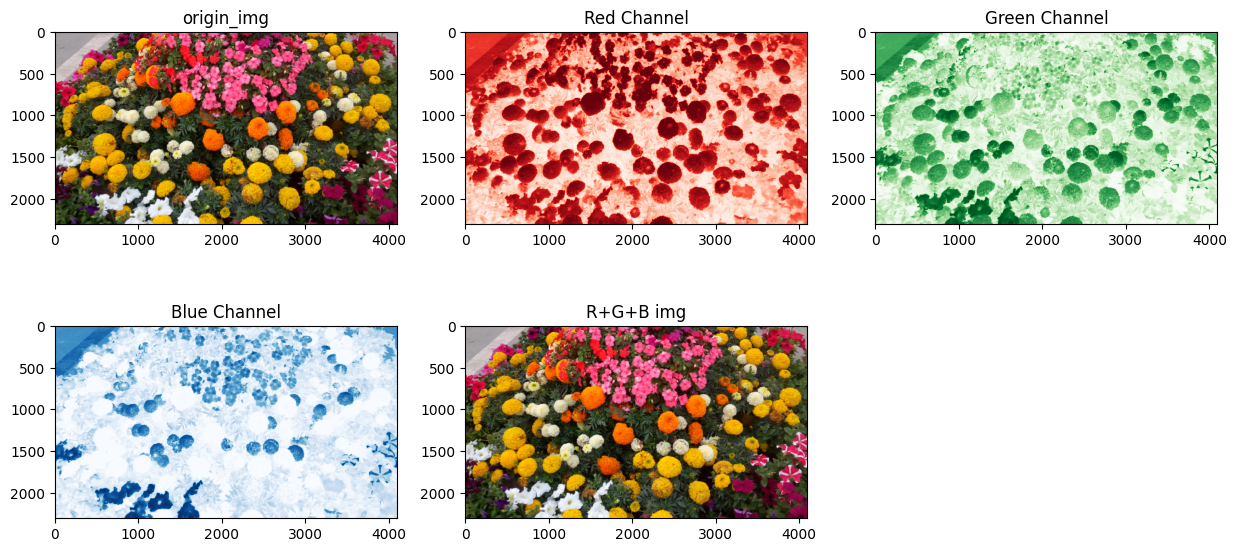

In [2]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

# 영상 불러오기
Q1_img = cv2.imread("/content/drive/MyDrive/images/flowers.png")

# BGR 채널 순서를 RGB 채널로 변경
RGB_img = cv2.cvtColor(Q1_img, cv2.COLOR_BGR2RGB)

# R, G, B 채널로 분할하기
Red_img, Green_img, Blue_img = cv2.split(RGB_img)

# R, G, B 이미지 출력
plt.figure(figsize=(15,7))
plt.subplot(2, 3, 1)
plt.title("origin_img")
plt.imshow(RGB_img)
# R
plt.subplot(2,3,2)
plt.title("Red Channel")
plt.imshow(Red_img,cmap = 'Reds')
# G
plt.subplot(2,3,3)
plt.title("Green Channel")
plt.imshow(Green_img,cmap = 'Greens')
# B
plt.subplot(2,3,4)
plt.title("Blue Channel")
plt.imshow(Blue_img,cmap = 'Blues')
# RGB 합친 이미지
RGB_img[:,:,0] = Red_img
RGB_img[:,:,1] = Green_img
RGB_img[:,:,2] = Blue_img
plt.subplot(2,3,5)
plt.title("R+G+B img")
plt.imshow(RGB_img)

plt.show()

Question2. peppers.jpg 이미지 활용

final global treshold of Red: 134.4230151702616
final global treshold of Blue: 110.53231328016712
final global treshold of Green: 94.04183013585995
final global treshold of gray: 118.09608691346247


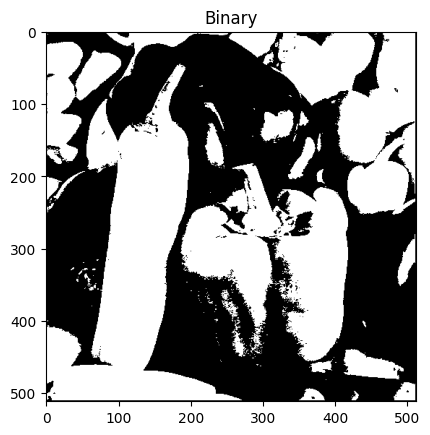

In [93]:
Q2_img = cv2.imread("/content/drive/MyDrive/images/peppers.jpg")

def globalTreshold(input_img):
  G1 = []
  G2 = []
  T0 = 0.5 # Global Threshold
  T1 = 125 # initial Threshold
  T2 = 125
  key = True
  width, height = input_img.shape

  # 초기 임계값과 보정 후 임계값이 종료조건 T0보다 작을 때 까지 반복
  while(key):
    T1 = T2
    for i in range(width):
      for j in range(height):

  # 임계값보다 큰 픽셀과 작은 픽셀을 나눈다.
          if input_img[i][j] > T1:
            G1.append(input_img[i][j])
          else:
            G2.append(input_img[i][j])

  # 두 그룹의 평균값으로 임계값을 갱신한다.
    T2 = (( np.mean(G1) + np.mean(G2) )/2)
  #  print(f"the difference between old and new: {abs(T1-T2)}")

  # 종료조건
    if (abs(T1-T2)<T0):
      key = False

  return T2


# 2-1) R, G, B 각 채널별로 전역임계값을 구하시오
RGB_img = cv2.cvtColor(Q2_img, cv2.COLOR_BGR2RGB)
Red_img, Green_img, Blue_img = cv2.split(RGB_img)
print(f"final global treshold of Red: {globalTreshold(Red_img)}")
print(f"final global treshold of Blue: {globalTreshold(Green_img)}")
print(f"final global treshold of Green: {globalTreshold(Blue_img)}")


# 2-2) Gray Scale로 변환한 후 전역임계값을 구하시오
Q2_img = cv2.cvtColor(Q2_img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(Q2_img, cv2.COLOR_RGB2GRAY)
print(f"final global treshold of gray: {globalTreshold(gray_img)}")

# 2-3) 2)에 얻은 전역임계값을 기준으로 영상을 이진화 하시오
ret, BIN_img = cv2.threshold(gray_img, globalTreshold(gray_img), 255, cv2.THRESH_BINARY)
plt.title("Binary")
plt.imshow(BIN_img,cmap = 'gray')

Question 3. peppers.jpg 이미지 활용

Q3-1:  151.80313110351562


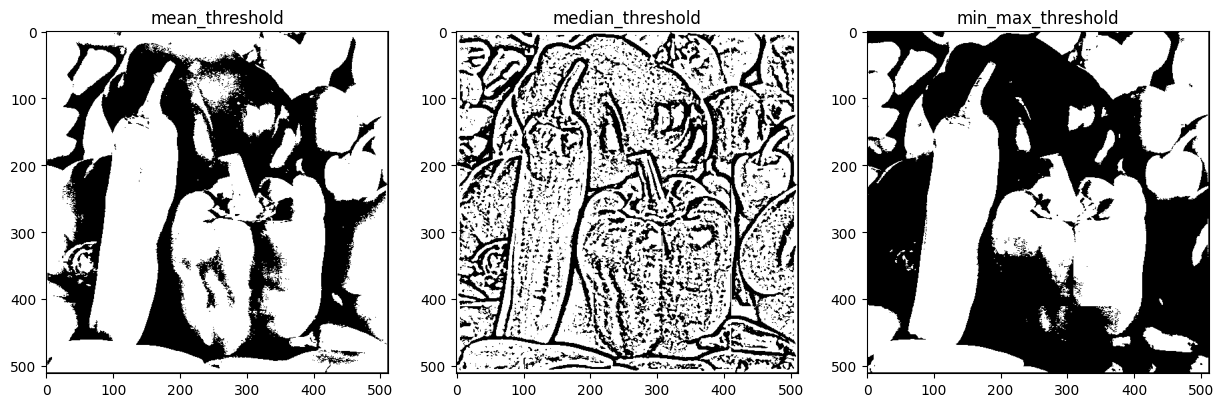

In [154]:
Q3_img = cv2.imread("/content/drive/MyDrive/images/peppers.jpg")
Q3_gray_img = cv2.cvtColor(Q3_img, cv2.COLOR_RGB2GRAY)

# 3-1) 이미지의 블록 개수를 25개로 나눈 후 적응적 임계값을 구하시오
th2 = cv2.adaptiveThreshold(Q3_gray_img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,25,2)
print("Q3-1: ", np.mean(th2))

# 3-2) 적응적 임계값을 구한 결과(아래 3가지 방법)를 기준으로 각 블록을 이진화 한 결과를 나타내시오.
# 3-2-a) 블록 안의 픽셀값들의 평균값을 이용할 경우에 대한 결과
threshold_img1 = cv2.adaptiveThreshold(Q3_gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, offset)
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
plt.title("mean_threshold")
plt.imshow(threshold_img1, cmap = 'gray')
# 3-2-b) 블록 안의 픽셀값들의 중간값을 이용할 경우에 대한 결과

h, w = Q3_gray_img.shape
block_size = int(np.ceil(h/5))

# 중앙값 기반의 적응적 이진화 수행
adaptive_thrs = []
for i in range(0, h, block_size):
    for j in range(0, w, block_size):
        block = Q3_gray_img[i:i+block_size, j:j+block_size]
        thrs = cv2.medianBlur(block, 3)
        thrs = cv2.adaptiveThreshold(thrs, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
        adaptive_thrs.append(thrs)

threshold_img2 = cv2.vconcat([cv2.hconcat(adaptive_thrs[5*i:5*(i+1)]) for i in range(5)])
plt.subplot(1, 3, 2)
plt.title("median_threshold")
plt.imshow(threshold_img2, cmap = 'gray')

# 3-2-c) 블록 안의 픽셀값들의 최대와 최소의 평균을 이용할 경우에 대한 결과

thresholds = []

for i in range(0, height, block_size):
    for j in range(0, width, block_size):
        img_block = Q3_gray_img[i:i+block_size, j:j+block_size]
        # 블록 내 최대/최소값 구하기
        min_val, max_val, _, _ = cv2.minMaxLoc(img_block)
        threshold = (min_val + max_val) / 2
        thresholds.append(threshold)

thresholds = np.array(thresholds)
threshold_img3 = np.zeros(Q3_gray_img.shape, dtype=np.uint8)
for i in range(0, height, block_size):
    for j in range(0, width, block_size):
        threshold = thresholds[int(i/block_size)*int(width/block_size)+int(j/block_size)]
        threshold_img3[i:i+block_size, j:j+block_size] = cv2.inRange(Q3_gray_img[i:i+block_size, j:j+block_size], threshold, 255)

plt.subplot(1, 3, 3)
plt.title("min_max_threshold")
plt.imshow(threshold_img3, cmap = 'gray')


Question 4. MOT16-1.png 이미지 활용

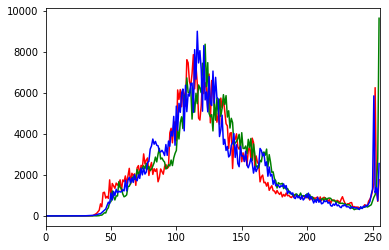

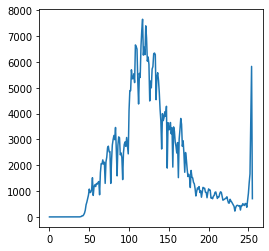

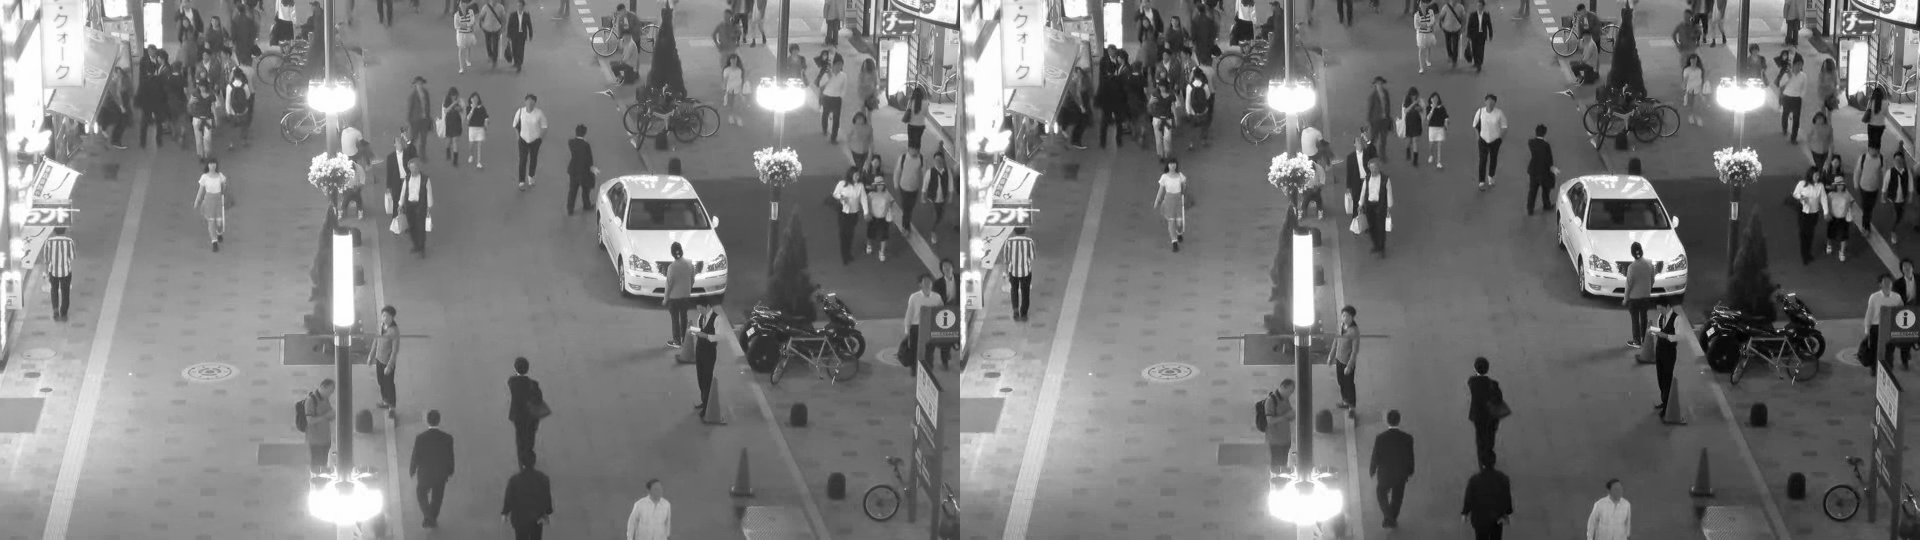

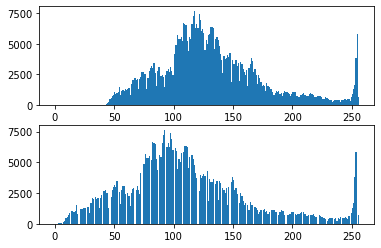

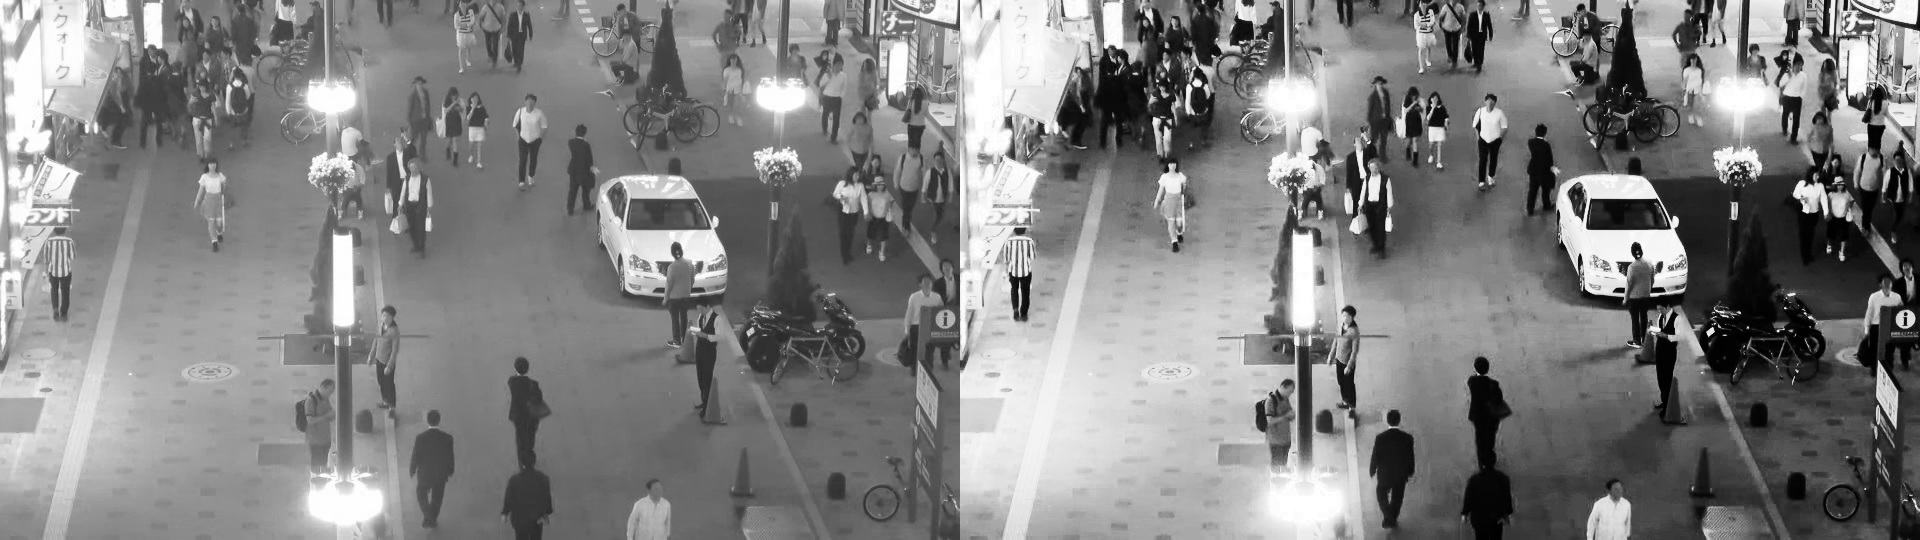

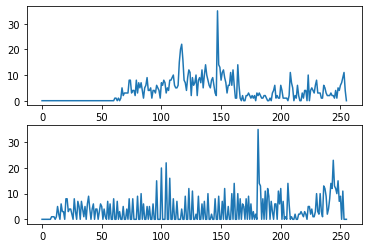

In [ ]:
Q4_img = cv2.imread("/content/drive/MyDrive/images/MOT16-1.png")

# 4-1) R/G/B 각 채널별 히스토그램 분포를 나타내시오
Q4_img = cv2.cvtColor(Q4_img, cv2.COLOR_BGR2RGB)
Red_img, Green_img, Blue_img = cv2.split(Q4_img)
color = ('r','g','b')

for i, col in enumerate(color):
  histr = cv2.calcHist([Q4_img],[i],None,[256],[0,256])
  plt.plot(histr,color = col)
  plt.xlim([0,256])
  


# 4-2) Gray Scale로 변환한 후 히스토그램 분포를 나타내시오
Q4_img = cv2.cvtColor(Q4_img, cv2.COLOR_RGB2GRAY)
histr2 = cv2.calcHist([Q4_img],[0],None,[256],[0,256])
plt.figure(figsize=(4,4))
plt.plot(histr2)
plt.show()

# 4-3) 히스토그램 스트레칭을 적용한 결과의 이미지와 스트레칭 적용 후의 히스토그램 분포 그래프를 나타내시오.
out = Q4_img.copy()
width, height = Q4_img.shape
high = Q4_img.max()
low = Q4_img.min()

for i in range(width):
  for j in range(height):
    out[i][j] = ((Q4_img[i][j] - low) * 255/(high-low))
dst1 = np.hstack((Q4_img,out))
cv2_imshow(dst1)

plt.figure()
plt.subplot(2,1,1),plt.hist(Q4_img.ravel(), 256, [0,256])
plt.subplot(2,1,2),plt.hist(out.ravel(), 256, [0,256])
plt.show()

# 4-4) 히스토그램 평활화를 적용한 결과의 이미지와 평활화 후의 히스토그램 분포 그래프를 나타내시오.
out2 = cv2.equalizeHist(Q4_img)
dst2 = np.hstack((Q4_img,out2))
cv2_imshow(dst2)

plt.figure()
img_hist=cv2.calcHist(Q4_img,[0],None,[256],[0,255])
plt.subplot(2,1,1), plt.plot(img_hist)
img2_hist=cv2.calcHist(out2,[0],None,[256],[0,255])
plt.subplot(2,1,2), plt.plot(img2_hist)
plt.show()

Question 5. Copy of Picture1.png와 Copy of Picture2.png를 활용하여 아래 문제들의 결과 이미지를 출력하시오

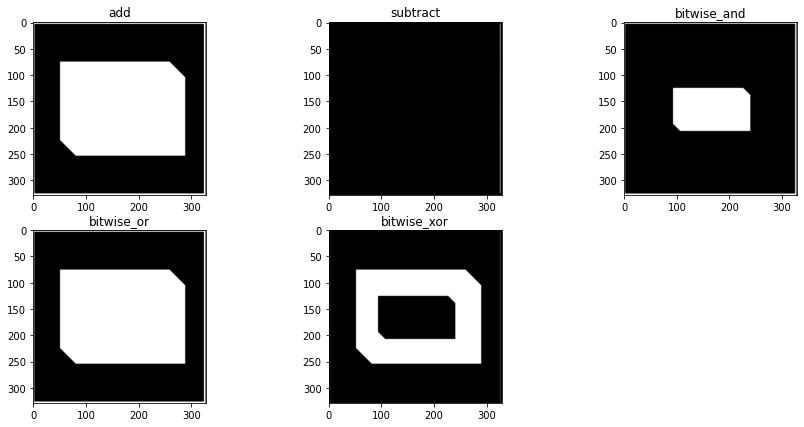

In [ ]:
Q5_img1 = cv2.imread("/content/drive/MyDrive/images/Copy of Picture1.png")
Q5_img2 = cv2.imread("/content/drive/MyDrive/images/Copy of Picture2.png")
Q5_img1 = cv2.cvtColor(Q5_img1, cv2.COLOR_BGR2GRAY)
Q5_img2 = cv2.cvtColor(Q5_img2, cv2.COLOR_BGR2GRAY)

# 5-1) 두 이미지 덧셈
img_add = cv2.add(Q5_img1, Q5_img2)
plt.figure(figsize=(15,7))
plt.subplot(2, 3, 1)
plt.title("add")
plt.imshow(img_add, cmap = 'gray')

# 5-2) 두 이미지 뺄셈
img_sbt = cv2.subtract(Q5_img1, Q5_img2)

plt.subplot(2, 3, 2)
plt.title("subtract")
plt.imshow(img_sbt, cmap = 'gray')

# 5-3) 두 이미지 AND
img_and = cv2.bitwise_and(Q5_img1, Q5_img2)

plt.subplot(2, 3, 3)
plt.title("bitwise_and")
plt.imshow(img_and, cmap = 'gray')

# 5-4) 두 이미지 OR
img_or = cv2.bitwise_or(Q5_img1, Q5_img2)

plt.subplot(2, 3, 4)
plt.title("bitwise_or")
plt.imshow(img_or, cmap = 'gray')

# 5-5) 두 이미지 XOR
img_xor = cv2.bitwise_xor(Q5_img1, Q5_img2)

plt.subplot(2, 3, 5)
plt.title("bitwise_xor")
plt.imshow(img_xor, cmap = 'gray')

plt.show()